In [1]:
import numpy as np
import pandas as pd
import os
import random
import sys
#import cv2
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.model_selection import train_test_split

In [2]:
import torch

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [4]:
label_data = pd.read_csv('labels.csv')

In [5]:
label_data

,diabetes,disc,macular,myopia,retina-vessel,others,normal,image id
0,1,0,0,0,0,0,0,000d72e51e43e709f34987c5e02c323f.jpg
1,1,0,0,0,0,0,0,56db7fb3ae63188404d486ace71309e2.jpeg
2,1,0,0,0,0,0,0,0575ef454244e4d276e73f7c69ea50be.jpeg
3,1,0,0,0,0,0,0,312400457103712512a0d467b6f73b83.jpeg
4,1,0,0,0,0,0,0,49bdcae41119295232479321d888ee93.jpeg
...,...,...,...,...,...,...,...,...
6288,0,0,0,0,1,0,0,f498533bdec9be551db73ee79dc5741a.jpg
6289,0,0,0,0,1,0,0,f58d7f3be02ae38388a9c887745ba635.jpg
6290,0,0,1,1,0,0,0,99555b68964c0deabbaaddf7d66fa81f.jpg
6291,0,0,1,0,1,0,0,2512e91fe0037994bd4fb623e7cd38ea.jpg


In [6]:
label_data.count()

diabetes         6293
disc             6293
macular          6293
myopia           6293
retina-vessel    6293
others           6293
normal           6293
image id         6293
dtype: int64

In [7]:
labels = []

for i in range(label_data.shape[0]):
    if label_data['normal'][i] == 1:
        labels.append(0)
    elif label_data['diabetes'][i]==1:
        labels.append(1)
    elif label_data['disc'][i] == 1:
        labels.append(2)
    elif label_data['macular'][i] == 1:
        labels.append(3)
    elif label_data['myopia'][i] == 1:
        labels.append(4)
    elif label_data['retina-vessel'][i] == 1:
        labels.append(5)

In [8]:
'normal','diabetes','disc','macular','myopia','retina-vessel'

('normal', 'diabetes', 'disc', 'macular', 'myopia', 'retina-vessel')

In [54]:
label_data['labels'] = labels
label_data['labels'].hist(figsize = (10, 6))

ValueError: Length of values (6293) does not match length of index (6270)

<AxesSubplot:>

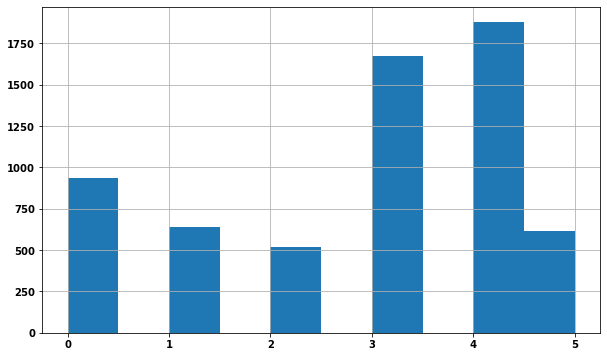

In [60]:
label_data['labels'].hist(figsize = (10, 6))

In [10]:
label_data.labels.value_counts()

4    1881
3    1681
0     937
1     649
5     622
2     523
Name: labels, dtype: int64

In [11]:
base_image_dir = os.path.join(os.getcwd(), 'train_images')
base_image_dir

'D:\\Datasets\\new-multi-eye-disease-detection\\train_images'

In [12]:
label_data['path'] = label_data['image id'].map(lambda x: os.path.join(base_image_dir,'{}'.format(x)))

In [13]:
label_data.path[0]

'D:\\Datasets\\new-multi-eye-disease-detection\\train_images\\000d72e51e43e709f34987c5e02c323f.jpg'

In [14]:
label_data['exists'] = label_data['path'].map(os.path.exists)
label_data = label_data[label_data['exists']].drop_duplicates()

In [15]:
label_data.to_csv('label_data.csv',index=False)

In [16]:
label_data = pd.read_csv('label_data.csv')

In [17]:
train_val_df, test_df = train_test_split(label_data,
                                        test_size=0.20,
                                        random_state=2020,
                                        stratify=label_data['labels'])

In [18]:
train_df, val_df = train_test_split(train_val_df, test_size=0.125, random_state=2020,stratify=train_val_df['labels'])

In [19]:
len(train_df), len(val_df), len(test_df)

(4389, 627, 1254)

In [20]:
train_df.labels.value_counts()

4    1315
3    1174
0     656
1     446
5     432
2     366
Name: labels, dtype: int64

In [21]:
test_df.labels.value_counts()

4    376
3    335
0    187
1    128
5    124
2    104
Name: labels, dtype: int64

In [22]:
val_df.labels.value_counts()

4    188
3    167
0     94
1     64
5     62
2     52
Name: labels, dtype: int64

In [23]:
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [22]:
train_df

,diabetes,disc,macular,myopia,retina-vessel,others,normal,image id,labels,path,exists
0,0,0,0,1,0,0,0,5b0b31767df79ce62f2b9d39beed4e05.jpg,4,D:\Datasets\new-multi-eye-disease-detection\tr...,True
1,0,0,1,0,0,0,0,81acae580bc5e0056aab0f6866d6272b.jpg,3,D:\Datasets\new-multi-eye-disease-detection\tr...,True
2,0,0,0,0,1,0,0,073e8623e9781c8245968fded02f8dfb.jpg,5,D:\Datasets\new-multi-eye-disease-detection\tr...,True
3,1,0,0,0,0,0,0,76d8558393033661406ae5c91924cb04.jpeg,1,D:\Datasets\new-multi-eye-disease-detection\tr...,True
4,0,0,1,0,0,0,0,5771412097d154dc551011aa6b73d333.jpg,3,D:\Datasets\new-multi-eye-disease-detection\tr...,True
...,...,...,...,...,...,...,...,...,...,...,...
4384,0,0,1,0,0,0,0,b9fb638497595b4395fb774828632e9d.jpg,3,D:\Datasets\new-multi-eye-disease-detection\tr...,True
4385,0,0,0,1,0,0,0,ddd4d8b2d1f61d1d83b59a80c06d5f85.jpg,4,D:\Datasets\new-multi-eye-disease-detection\tr...,True
4386,0,0,0,1,0,0,0,bdd81aabfee546c3f0bafbe4608a5067.png,4,D:\Datasets\new-multi-eye-disease-detection\tr...,True
4387,0,0,1,0,0,0,0,17f8503961ab910f3ed86194e8339d64.jpg,3,D:\Datasets\new-multi-eye-disease-detection\tr...,True


# Load dataset 

In [24]:
from data.Dataset import Retina
import torch
import torchvision
import torch.nn as nn
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms
from torch.utils.data import SubsetRandomSampler as SRS
from torch.utils.data import DataLoader
from torchvision.models import resnet50
from torchvision.models import resnet101
import time
import copy

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [26]:
"""
加入data augmentation
"""
input_size=299 # for inception v3

train_transform = transforms.Compose([
    #transforms.RandomResizedCrop(
    #size=input_size,
    #scale=data_aug['scale'],
    #ratio=data_aug['stretch_ratio']
    #),
    transforms.RandomResizedCrop((input_size,input_size)),
    transforms.RandomAffine(
        degrees=(-180,180),
        translate=(40/224, 20/224),
        scale=None,
        shear=None
    ),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    #KrizhevskyColorAugmentation(sigma=data_aug['sigma'])
])

test_transform = transforms.Compose([
    transforms.Resize((input_size,input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
]) 

In [27]:
train_dataset = Retina(train_df,transforms=train_transform)
val_dataset = Retina(val_df, transforms=test_transform)
test_dataset = Retina(test_df, transforms=test_transform)

In [28]:
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=20)

In [25]:
len(train_loader),len(train_dataset)

(220, 4389)

In [26]:
len(val_loader),len(val_dataset)

(32, 627)

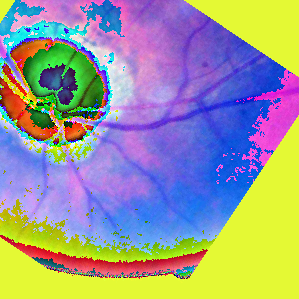

In [85]:
to_img = transforms.ToPILImage()
a = to_img(train_dataset[1][0])
a

In [89]:
a.save('.\Results\Preprossed eye train.png')

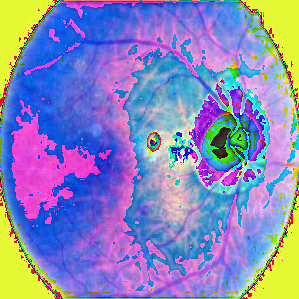

In [77]:
b = to_img(test_dataset[1][0])
b

In [90]:
b.save('.\Results\Preprossed eye test.png')

# Define train and test function

In [29]:
def train_model(model, criterion, optimizer,scheduler, num_epochs=50, train_loader=train_loader):
    since = time.time()
    global_step = 0
    epoch_list = []
    
    train_acc_list = []
    train_loss_list = []
    val_acc_list = []
    val_loss_list = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        model.train()  # Set model to training mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            with torch.set_grad_enabled(True):
                        
                outputs, aux_outputs = model(inputs)
                loss1 = criterion(outputs, labels)
                loss2 = criterion(aux_outputs, labels)
                loss = loss1 + 0.4*loss2
                _, preds = torch.max(outputs, 1)  # 1 is the dimension

                # backward + optimize
                loss.backward()
                optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # Decay learning rate

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.item() / len(train_dataset)
        
        train_loss_list.append(epoch_loss)
        train_acc_list.append(epoch_acc)
        epoch_list.append(global_step)

        print('{} Loss: {: .4f} Acc: {: .4f}'.format(
            'Train', epoch_loss, epoch_acc
        ))
        
        # plot for visdom
        
        global_step += 1
        scheduler.step()
        #vis.line([epoch_acc],[global_step], win='train_acc', update='append')
        #vis.line([epoch_loss],[global_step], win='train_loss',update='append')
        
        
        # start validation
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _,preds = torch.max(outputs,1)
            loss = criterion(outputs,labels)
            
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
        
        epoch_val_loss = val_loss/len(val_dataset)
        epoch_val_acc = val_corrects.item()/len(val_dataset)
        
        val_loss_list.append(epoch_val_loss)
        val_acc_list.append(epoch_val_acc)
        
        # visdom plot
        #vis.line([epoch_val_acc], [global_step],win='val_acc', update='append')
        #vis.line([epoch_val_loss],[global_step], win='val_loss', update='append')
        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            
    # plotting
    plt.title("Learning Curve - loss")
    plt.plot(epoch_list, train_loss_list, label="Train_loss")
    plt.plot(epoch_list, val_loss_list, label="Val_loss")
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()
    
    plt.title("Learning Curve - accuracy")
    plt.plot(epoch_list, train_acc_list, label="Train_acc")
    plt.plot(epoch_list, val_acc_list, label="Val_acc")
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60
    ))
    print('Best val Acc: {:4f}'.format(best_acc))
    

    # load best model weights
    return best_model_wts, train_acc_list, train_loss_list , val_acc_list, val_loss_list

In [30]:
def test(model, test_loader):
    test_corrects = 0
    all_preds = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)
    
    model.eval()
    with torch.no_grad():
    
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
        
            outputs = model(inputs)
        
            _,preds = torch.max(outputs,1)
            
            all_preds = torch.cat((all_preds, preds.float()), dim=0)
            all_labels = torch.cat((all_labels,labels.float()), dim=0)
        
            test_corrects += torch.sum(preds == labels.data)
        
        test_acc = test_corrects.double()/len(test_loader.sampler)
    
    return test_corrects, test_acc, all_preds, all_labels

## Try using Inception V3 

In [31]:
from torchvision.models import inception_v3

In [34]:
Iv3_3 = inception_v3(pretrained=True)
Iv3_3

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [35]:
num_classes = 6

num_in_ft1 = Iv3_3.AuxLogits.fc.in_features
Iv3_3.AuxLogits.fc = nn.Linear(num_in_ft1, num_classes)

num_in_ft2 = Iv3_3.fc.in_features
Iv3_3.fc = nn.Linear(num_in_ft2, num_classes) 

Iv3_3.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

Epoch 0/49
----------
Train Loss:  1.7283 Acc:  0.5427
Epoch 1/49
----------
Train Loss:  1.3127 Acc:  0.6569
Epoch 2/49
----------
Train Loss:  1.0581 Acc:  0.7266
Epoch 3/49
----------
Train Loss:  0.9744 Acc:  0.7505
Epoch 4/49
----------
Train Loss:  0.8668 Acc:  0.7822
Epoch 5/49
----------
Train Loss:  0.7306 Acc:  0.8166
Epoch 6/49
----------
Train Loss:  0.6842 Acc:  0.8230
Epoch 7/49
----------
Train Loss:  0.6512 Acc:  0.8337
Epoch 8/49
----------
Train Loss:  0.6121 Acc:  0.8469
Epoch 9/49
----------
Train Loss:  0.5635 Acc:  0.8535
Epoch 10/49
----------
Train Loss:  0.5290 Acc:  0.8615
Epoch 11/49
----------
Train Loss:  0.4818 Acc:  0.8776
Epoch 12/49
----------
Train Loss:  0.4671 Acc:  0.8831
Epoch 13/49
----------
Train Loss:  0.4434 Acc:  0.8929
Epoch 14/49
----------
Train Loss:  0.4742 Acc:  0.8870
Epoch 15/49
----------
Train Loss:  0.4507 Acc:  0.8888
Epoch 16/49
----------
Train Loss:  0.4296 Acc:  0.8950
Epoch 17/49
----------
Train Loss:  0.4020 Acc:  0.8982
Ep

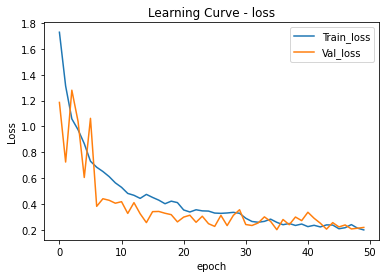

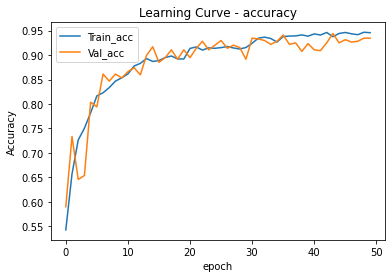

Training complete in 276m 22s
Best val Acc: 0.944179


In [34]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(Iv3_1.parameters(),
                                     lr=0.01, momentum=0.90) 

scheduler = lr_scheduler.StepLR(optimizer,
                               step_size=10, gamma=0.9)

data = train_model(Iv3_1, criterion,
                                 optimizer,scheduler, num_epochs=50)

In [36]:
results = test(Iv3_1, test_loader)
results

(tensor(1201, device='cuda:0'),
 tensor(0.9577, device='cuda:0', dtype=torch.float64),
 tensor([2., 4., 4.,  ..., 3., 4., 0.], device='cuda:0'),
 tensor([2., 4., 4.,  ..., 5., 4., 0.], device='cuda:0'))

In [46]:
model_dir = os.path.join(os.getcwd(), 'model')
torch.save(Iv3_1.state_dict(), os.path.join(model_dir,'Iv3_1'))

## Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [38]:
y_preds = results[2]
y_true = results[3]
cm = confusion_matrix(y_true.cpu(), y_preds.cpu())

In [42]:
cm

array([[186,   0,   0,   1,   0,   0],
       [  0, 122,   0,   5,   0,   1],
       [  0,   0,  88,   6,   9,   1],
       [  0,   2,   0, 321,   9,   3],
       [  0,   0,   0,   2, 374,   0],
       [  0,   6,   0,   7,   1, 110]], dtype=int64)

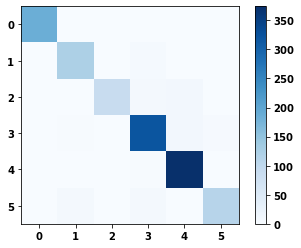

In [55]:
fig, ax = plt.subplots()
cmap = plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

In [43]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

In [56]:
classes = ['normal','diabetes','disc','macular','myopia','retina-vessel']

In [49]:
def make_confusion_matrix(cm, classes):
    fig, ax = plt.subplots()
    cmap = plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_xlabel('Predicted label', fontsize=14, fontweight='bold')
    ax.set_ylabel('True label', fontsize=14, fontweight='bold')
    ax.set_title('Confusion matrix (Test)', fontsize=14, fontweight='bold',y=1.05)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="k")
    
    return fig
    #fig.tight_layout()

In [110]:
fig.savefig('.\Results\Confusion Matrix Iv3_1.png', bbox_inches="tight")

## Train for another 30 epoch to furthur improve

Epoch 0/29
----------
Train Loss:  0.2555 Acc:  0.9387
Epoch 1/29
----------
Train Loss:  0.3443 Acc:  0.9166
Epoch 2/29
----------
Train Loss:  0.2787 Acc:  0.9316
Epoch 3/29
----------
Train Loss:  0.2509 Acc:  0.9362
Epoch 4/29
----------
Train Loss:  0.2507 Acc:  0.9405
Epoch 5/29
----------
Train Loss:  0.2695 Acc:  0.9307
Epoch 6/29
----------
Train Loss:  0.2752 Acc:  0.9296
Epoch 7/29
----------
Train Loss:  0.2824 Acc:  0.9289
Epoch 8/29
----------
Train Loss:  0.2768 Acc:  0.9310
Epoch 9/29
----------
Train Loss:  0.2502 Acc:  0.9394
Epoch 10/29
----------
Train Loss:  0.2254 Acc:  0.9419
Epoch 11/29
----------
Train Loss:  0.2156 Acc:  0.9481
Epoch 12/29
----------
Train Loss:  0.2152 Acc:  0.9433
Epoch 13/29
----------
Train Loss:  0.2204 Acc:  0.9430
Epoch 14/29
----------
Train Loss:  0.2441 Acc:  0.9417
Epoch 15/29
----------
Train Loss:  0.2065 Acc:  0.9483
Epoch 16/29
----------
Train Loss:  0.2385 Acc:  0.9410
Epoch 17/29
----------
Train Loss:  0.1783 Acc:  0.9556
Ep

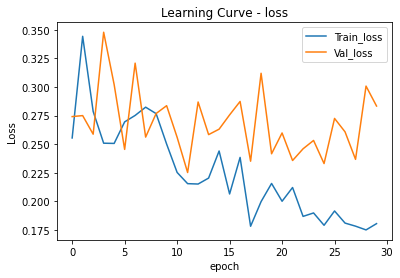

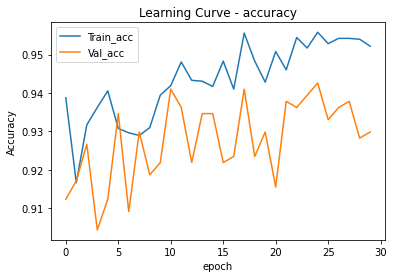

Training complete in 165m 34s
Best val Acc: 0.942584


In [47]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(Iv3_1.parameters(),
                                     lr=0.01, momentum=0.90) 

scheduler = lr_scheduler.StepLR(optimizer,
                               step_size=10, gamma=0.9)

data2 = train_model(Iv3_1, criterion,
                                 optimizer,scheduler, num_epochs=30)

In [48]:
test(Iv3_1, test_loader)

(tensor(1200, device='cuda:0'),
 tensor(0.9569, device='cuda:0', dtype=torch.float64),
 tensor([2., 4., 4.,  ..., 3., 4., 0.], device='cuda:0'),
 tensor([2., 4., 4.,  ..., 5., 4., 0.], device='cuda:0'))

In [50]:
 Iv3_1.load_state_dict(data2[0])

<All keys matched successfully>

In [40]:
results2 = test(Iv3_3, test_loader)

In [41]:
results2

(tensor(1211, device='cuda:0'),
 tensor(0.9657, device='cuda:0', dtype=torch.float64),
 tensor([2., 4., 4.,  ..., 3., 4., 0.], device='cuda:0'),
 tensor([2., 4., 4.,  ..., 5., 4., 0.], device='cuda:0'))

In [52]:
torch.save(Iv3_1.state_dict(), os.path.join(model_dir,'Iv3_2'))

In [62]:
torch.save(data,'data1.pt')

In [66]:
torch.save(data2,'data2.pt')

# Train 100 epoch to overfit train set

Epoch 0/99
----------
Train Loss:  1.5461 Acc:  0.5988
Epoch 1/99
----------
Train Loss:  1.1044 Acc:  0.7168
Epoch 2/99
----------
Train Loss:  0.9635 Acc:  0.7460
Epoch 3/99
----------
Train Loss:  0.8342 Acc:  0.7908
Epoch 4/99
----------
Train Loss:  0.7838 Acc:  0.8022
Epoch 5/99
----------
Train Loss:  0.6843 Acc:  0.8328
Epoch 6/99
----------
Train Loss:  0.6759 Acc:  0.8268
Epoch 7/99
----------
Train Loss:  0.5975 Acc:  0.8492
Epoch 8/99
----------
Train Loss:  0.5884 Acc:  0.8480
Epoch 9/99
----------
Train Loss:  0.5585 Acc:  0.8553
Epoch 10/99
----------
Train Loss:  0.5216 Acc:  0.8706
Epoch 11/99
----------
Train Loss:  0.5114 Acc:  0.8738
Epoch 12/99
----------
Train Loss:  0.4766 Acc:  0.8838
Epoch 13/99
----------
Train Loss:  0.4425 Acc:  0.8886
Epoch 14/99
----------
Train Loss:  0.4283 Acc:  0.8941
Epoch 15/99
----------
Train Loss:  0.4459 Acc:  0.8911
Epoch 16/99
----------
Train Loss:  0.4570 Acc:  0.8815
Epoch 17/99
----------
Train Loss:  0.4307 Acc:  0.8931
Ep

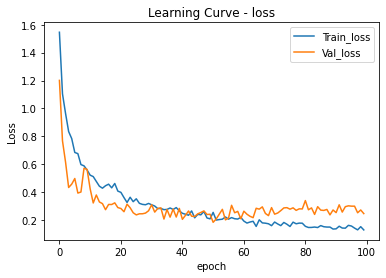

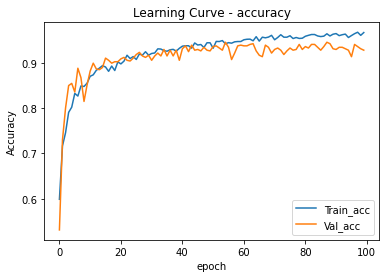

Training complete in 535m 60s
Best val Acc: 0.945774


In [36]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(Iv3_3.parameters(),
                                     lr=0.01, momentum=0.90) 

scheduler = lr_scheduler.StepLR(optimizer,
                               step_size=20, gamma=0.9)

data = train_model(Iv3_3, criterion,
                                 optimizer,scheduler, num_epochs=100)

In [37]:
results2 = test(Iv3_3, test_loader)
results2

(tensor(1211, device='cuda:0'),
 tensor(0.9657, device='cuda:0', dtype=torch.float64),
 tensor([2., 4., 4.,  ..., 3., 4., 0.], device='cuda:0'),
 tensor([2., 4., 4.,  ..., 5., 4., 0.], device='cuda:0'))

In [45]:
y_preds = results2[2]
y_true = results2[3]
cm = confusion_matrix(y_true.cpu(), y_preds.cpu())

In [46]:
classes = ['normal','diabetes','disc','macular','myopia','retina-vessel']

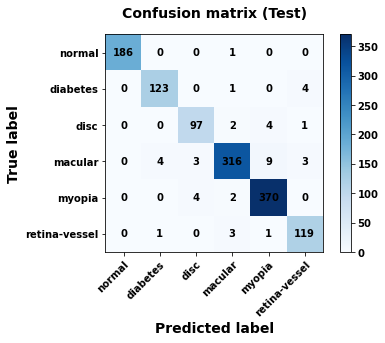

In [52]:
fig = make_confusion_matrix(cm,classes)

In [53]:
fig.savefig('.\Results\Confusion Matrix Iv3_3.png', bbox_inches="tight")

## Save learning curve

In [91]:
train_acc_list, train_loss_list , val_acc_list, val_loss_list = data[1], data[2], data[3], data[4]

In [94]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

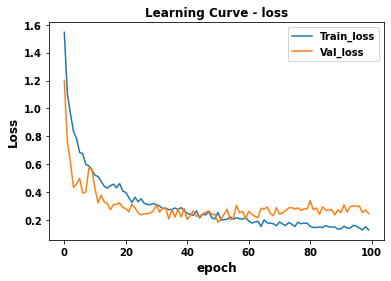

In [106]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'
plt.title("Learning Curve - loss", fontsize=12, fontweight='bold')
plt.plot(np.arange(100), train_loss_list, label="Train_loss")
plt.plot(np.arange(100), val_loss_list, label="Val_loss")
plt.xlabel("epoch", fontsize=12, fontweight='bold')
plt.ylabel("Loss", fontsize=12, fontweight='bold')
plt.legend(loc='best')

plt.savefig('.\Results\Learning Curve_Loss Iv3_3.png')
plt.show()

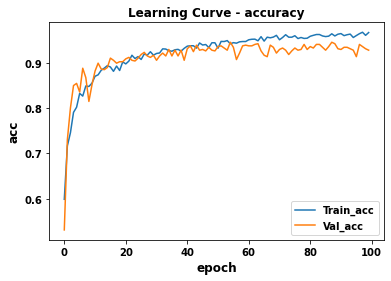

In [107]:
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'
plt.title("Learning Curve - accuracy", fontsize=12, fontweight='bold')
plt.plot(np.arange(100), train_acc_list, label="Train_acc")
plt.plot(np.arange(100), val_acc_list, label="Val_acc")
plt.xlabel("epoch", fontsize=12, fontweight='bold')
plt.ylabel("acc", fontsize=12, fontweight='bold')
plt.legend(loc='best')

plt.savefig('.\Results\Learning Curve_accuracy Iv3_3.png')
plt.show()

## Conv Visualization 

In [108]:
from PIL import Image

In [109]:
def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image succesfully loaded")
    return image

def normalize(image, transform):
    image = transform(image)
    image = image.cuda()
    image = image.unsqueeze(0)
    return image

def predict(model, image, label):
    model.eval()
    with torch.no_grad():
        output = model(image)
        _,pred = torch.max(output,1)
    print('Prediction: {}; Label: {}'.format(pred.item(),label) )

def deprocess(image):
    return image * torch.Tensor([0.485, 0.456, 0.406]).cuda()  + torch.Tensor([0.229, 0.224, 0.225]).cuda()

In [110]:
def make_saliency_map(input, model, label):
    input.requires_grad=True
    output = model.forward(input)
    output[0][label].backward()
    #grads = input.grad.data.clamp(min=0)
    grads = input.grad.data.abs()
    gradsout = grads.squeeze()
    gradsout = gradsout.transpose(0,1)
    gradsout = gradsout.transpose(1,2)
    gradsout = np.amax(gradsout.cpu().numpy(), axis=2) # return the maximum value in RGB channel
    
    true_image = input.data
    true_image = true_image.squeeze()
    true_image = true_image.transpose(0,1)
    true_image = true_image.transpose(1,2)
    true_image = deprocess(true_image)
    
    fig = plt.figure()
    
    plot_win = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image.cpu())
    plt.title('Original Image')
    
    plot_win = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(gradsout)
    plt.title('Saliency map')
    
    return true_image, gradsout

In [90]:
Iv3_1 = inception_v3(pretrained=False)

num_classes = 6

num_in_ft1 = Iv3_1.AuxLogits.fc.in_features
Iv3_1.AuxLogits.fc = nn.Linear(num_in_ft1, num_classes)

num_in_ft2 = Iv3_1.fc.in_features
Iv3_1.fc = nn.Linear(num_in_ft2, num_classes) 

Iv3_1.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [35]:
Iv3_1.load_state_dict(torch.load(os.path.join(os.getcwd(),'model','Iv3_2')))

<All keys matched successfully>

In [44]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(Iv3_1.parameters(),
                                     lr=0.01, momentum=0.90) 

scheduler = lr_scheduler.StepLR(optimizer,
                               step_size=10, gamma=0.9)

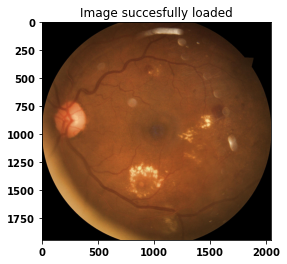

In [115]:
diabete_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\diabetes\3 (17).jpeg")
diabete_1_normal = normalize(diabete_1, test_transform)

In [52]:
diabete_1_normal.shape

torch.Size([1, 3, 299, 299])

In [55]:
a = iter(test_loader)
img, label = next(a)

In [56]:
img.shape

torch.Size([20, 3, 299, 299])

In [116]:
predict(Iv3_1, diabete_1_normal, 1)

Prediction: 1; Label: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


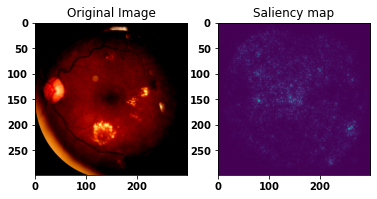

In [117]:
true_diabete_1,sal_diabete_1 = make_saliency_map(diabete_1_normal,Iv3_1,1)

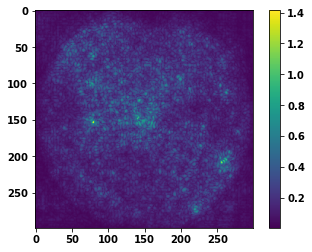

In [139]:
nout = np.power(sal_diabete_1, 0.5)
plt.imshow(nout)
plt.colorbar()

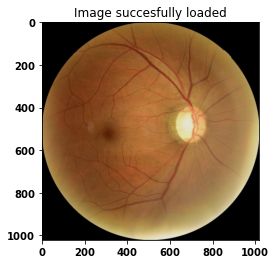

In [157]:
disc_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\disc\20200730171019700310.jpg")
disc_1_normal = normalize(disc_1, test_transform)

In [158]:
predict(Iv3_1, disc_1_normal, 2)

Prediction: 0; Label: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


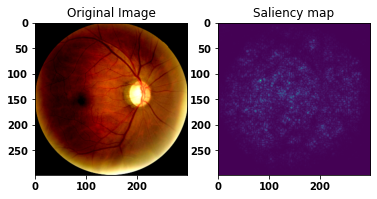

In [159]:
true_disc_1,sal_disc_1 = make_saliency_map(disc_1_normal,Iv3_3,2)

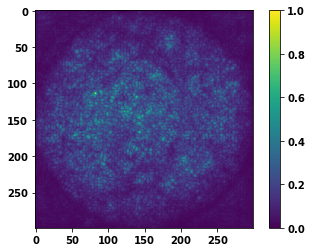

In [169]:
scaled_map=scale_saliency_map(sal_disc_1)

plt.imshow(np.power(scaled_map, 0.5))

plt.colorbar()
plt.savefig('.\Results\Sal map\disc_1 Iv3_3.png')

### diabete

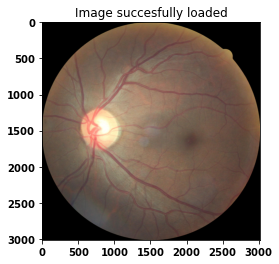

In [255]:
diabete_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\diabetes\2 (66).jpeg")
diabete_1_normal = normalize(diabete_1, test_transform)

In [256]:
predict(Iv3_3, diabete_1_normal, 1)

Prediction: 1; Label: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


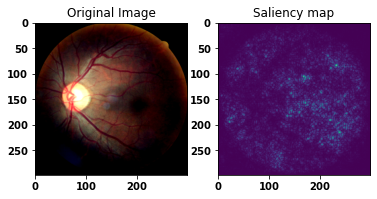

In [257]:
true_diabete_1,sal_diabete_1 = make_saliency_map(diabete_1_normal,Iv3_3,1)

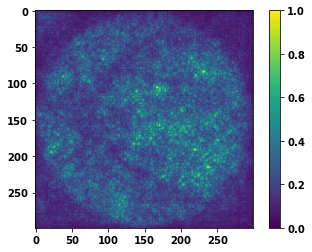

In [261]:
scaled_map=scale_saliency_map(sal_diabete_1)
plt.imshow(np.power(scaled_map, 0.4))
plt.colorbar()
plt.savefig('.\Results\Sal map\diabete_1 Iv3_3.png')

In [127]:
np.amax(sal_diabete_1), np.amin(sal_diabete_1)

(1.7008709, 1.9328563e-05)

In [138]:
def scale_saliency_map(sal_map):
    smax = np.amax(sal_map)
    smin = np.amin(sal_map)
    scaled_map = (sal_map-smin)/(smax-smin)
    
    return scaled_map

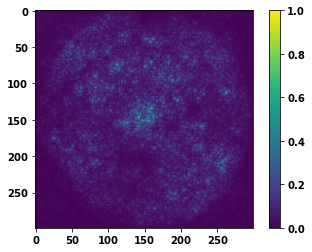

In [144]:
scaled_map=scale_saliency_map(sal_diabete_1)
plt.imshow(np.power(scaled_map, 0.7))
plt.colorbar()

In [131]:
np.amax(norm1), np.amin(norm1)

(0.08402965, 9.549063e-07)

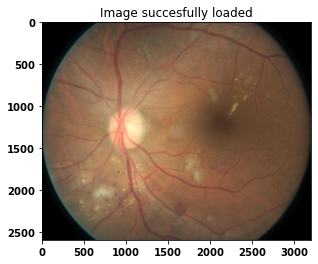

In [145]:
diabete_2 = load_image(r"D:\Datasets\multi-eye-disease-detection\diabetes\2 (162).jpeg")
diabete_2_normal = normalize(diabete_2, test_transform)

In [147]:
predict(Iv3_3, diabete_2_normal, 1)

Prediction: 1; Label: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


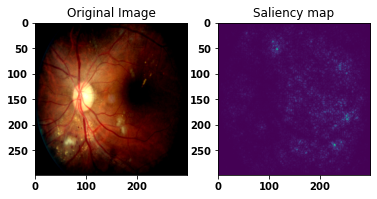

In [148]:
true_diabete_2,sal_diabete_2 = make_saliency_map(diabete_2_normal,Iv3_3,1)

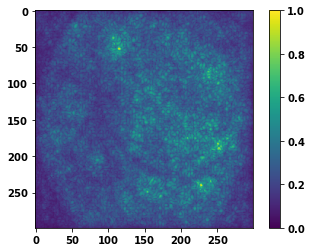

In [156]:
scaled_map=scale_saliency_map(sal_diabete_2)
plt.imshow(np.power(scaled_map, 0.3))
plt.colorbar()

### Macular

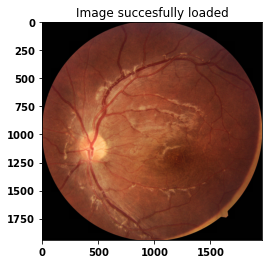

In [170]:
macular_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\macular\1604_20180305_103535.png")
macular_1_normal = normalize(macular_1, test_transform)

In [171]:
predict(Iv3_3, macular_1_normal, 3)

Prediction: 3; Label: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


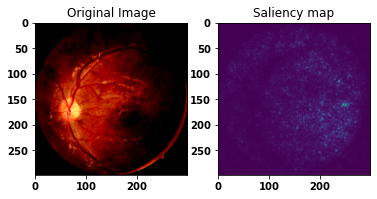

In [172]:
_,sal_macular_1 = make_saliency_map(macular_1_normal,Iv3_3,3)

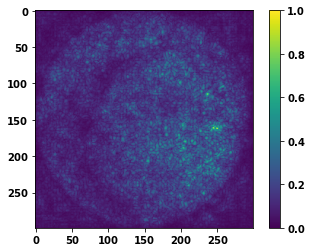

In [177]:
scaled_map=scale_saliency_map(sal_macular_1)
plt.imshow(np.power(scaled_map, 0.5))
plt.colorbar()
plt.savefig('.\Results\Sal map\macular Iv3_3.png')

### myopia

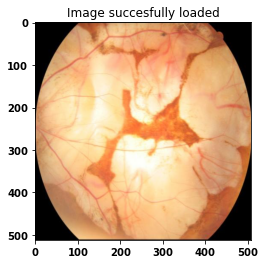

In [209]:
myopia_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\myopia\2013-10-18_C0027858.jpg")
myopia_1_normal = normalize(myopia_1, test_transform)

In [210]:
predict(Iv3_3, myopia_1_normal, 4)

Prediction: 4; Label: 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


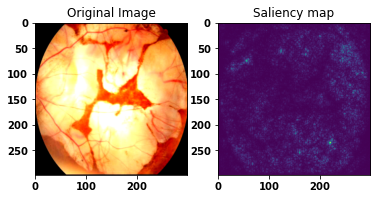

In [211]:
_,sal_myopia_1 = make_saliency_map(myopia_1_normal,Iv3_3,4)

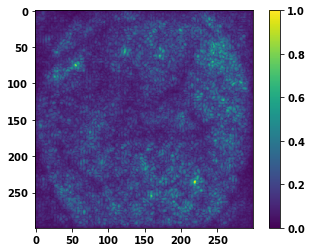

In [213]:
scaled_map=scale_saliency_map(sal_myopia_1)
plt.imshow(np.power(scaled_map, 0.5))
plt.colorbar()
plt.savefig('.\Results\Sal map\myopia Iv3_3.png')

### retina-vessel

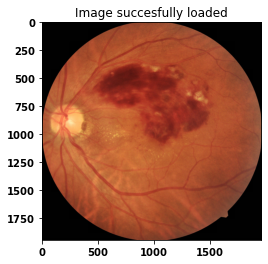

In [240]:
vessel_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\retina-vessel\467_20180109_093100.png")
vessel_1_normal = normalize(vessel_1, test_transform)

In [241]:
predict(Iv3_3, vessel_1_normal, 5)

Prediction: 5; Label: 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


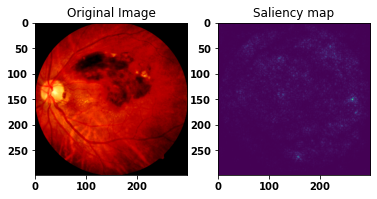

In [242]:
_,sal_vessel_1 = make_saliency_map(vessel_1_normal,Iv3_3,5)

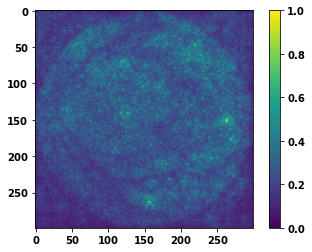

In [244]:
scaled_map=scale_saliency_map(sal_vessel_1)
plt.imshow(np.power(scaled_map, 0.3))
plt.colorbar()
plt.savefig('.\Results\Sal map\\retina-vessel_2 Iv3_3.png')

### normal

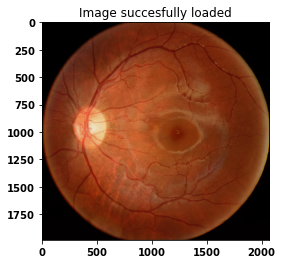

In [245]:
norm_1 = load_image(r"D:\Datasets\multi-eye-disease-detection\normal\0c13c9d7f65848f8ee5d7979d7b1b4720200111094812.jpg")
norm_1_normal = normalize(norm_1, test_transform)

In [248]:
predict(Iv3_3, norm_1_normal, 0)

Prediction: 0; Label: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


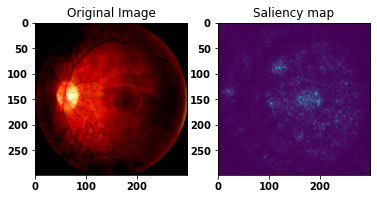

In [249]:
_,sal_normal_1 = make_saliency_map(norm_1_normal,Iv3_3,0)

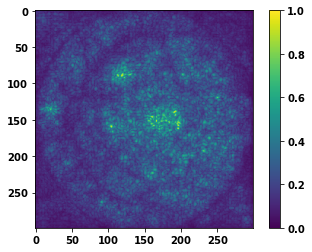

In [254]:
scaled_map=scale_saliency_map(sal_normal_1)
plt.imshow(np.power(scaled_map, 0.4))
plt.colorbar()
plt.savefig('.\Results\Sal map\\normal_1 Iv3_3.png')